# Concept Session
# Demo1: Data Preparation
# Import Data & Python Packages

In [1]:
#first we have to import all relevant python packages 
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt 
from matplotlib import pyplot
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.simplefilter(action='ignore')

In [3]:
# Read CSV train data file into DataFrame
titanic_df = pd.read_csv('./titanic_hospitalised.csv', sep=';')

# preview the data
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Hospitalized
0,0,3,Mr. Owen Harris Braund,male,22,1,0,725,0
1,0,3,Mr. Owen Harris Braund,male,22,1,0,725,0
2,0,3,Mr. Owen Harris Braund,male,22,1,0,725,0
3,0,3,Mr. Owen Harris Braund,male,22,1,0,725,0
4,0,3,Mr. Owen Harris Braund,male,22,1,0,725,0


In [4]:
print('The number of samples in data is {}.'.format(titanic_df.shape[0]))

The number of samples in data is 894.


### 1. Data Exploration and Visualization - Understanding the data

In [5]:
# explore the existing data types
titanic_df.dtypes

Survived                    int64
Pclass                      int64
Name                       object
Sex                        object
Age                         int64
Siblings/Spouses Aboard     int64
Parents/Children Aboard     int64
Fare                        int64
Hospitalized                int64
dtype: object

In [6]:
#explore the numeric data types
titanic_df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Hospitalized
count,894.000000,894.000000,894.000000,894.000000,894.000000,8.940000e+02,894.000000
mean,0.385906,2.306488,36.414989,0.527964,0.380313,1.278646e+05,0.385906
std,0.487081,0.837277,50.956353,1.101155,0.805005,4.109775e+05,0.487081
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,1.610000e+02,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,2.415000e+03,0.000000
75%,1.000000,3.000000,39.000000,1.000000,0.000000,7.895800e+04,1.000000
max,1.000000,3.000000,705.000000,8.000000,6.000000,5.123292e+06,1.000000


In [7]:
# explore the strings
titanic_string = titanic_df.select_dtypes(exclude=[np.number])
titanic_string.head(3)

,Name,Sex
0,Mr. Owen Harris Braund,male
1,Mr. Owen Harris Braund,male
2,Mr. Owen Harris Braund,male


It seems like we have duplicates in our data. Therefore, we will clean our data in the following steps.

### Gender wise survival rate

<AxesSubplot:xlabel='Sex'>

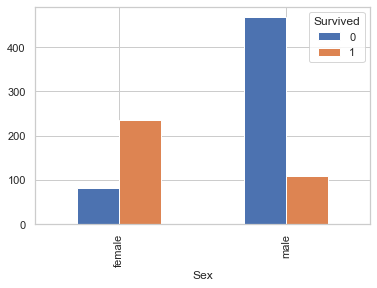

In [8]:
pd.crosstab(titanic_df.Sex,titanic_df.Survived).plot(kind='bar')

From the above chart, gender seems to play an important role in regards to the people who survived.

# 2. Data Preprocessing 

### Data quality | Missing Value Assessment

In [9]:
# check missing values in data
titanic_df[titanic_df.isnull().any(axis=1)]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Hospitalized
891,1,1,NaN,female,38,1,0,712833,1
892,1,3,NaN,female,26,0,0,7925,1
893,1,1,NaN,female,35,1,0,531,1


As we can see, there are three data points with missing values. There are different ways to deal with missing values, we decide to delete them.

In [10]:
# Deleting the missing values
print('Size of dataframe before dropna', titanic_df.shape)
titanic_df = titanic_df.dropna()
print('Size of dataframe after dropna', titanic_df.shape)

Size of dataframe before dropna (890, 9)
Size of dataframe after dropna (887, 9)


### Data quality  | Removing duplicates

In [11]:
titanic_df[titanic_df.duplicated()]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Hospitalized


Beforehand, we've already seen, that there might be duplicates in the dataset. To ensure data quality we have to delete the duplicates.

In [12]:
#deleting duplicates
print('Size of dataframe before drop_duplicates', titanic_df.shape)

titanic_df.drop_duplicates(inplace= True) # inplace overwrited the original dataframe

print('Size of dataframe after drop_duplicates', titanic_df.shape)

Size of dataframe before drop_duplicates (887, 9)
Size of dataframe after drop_duplicates (887, 9)


### Data quality  | Detect correlations

In [98]:
column_correlation = titanic_df.corr()
column_correlation

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Hospitalized
Survived,1.000000,-0.336528,-0.088817,-0.037082,0.080097,0.185415,1.000000
Pclass,-0.336528,1.000000,-0.050620,0.085026,0.020252,-0.296437,-0.336528
Age,-0.088817,-0.050620,1.000000,-0.128369,-0.062122,-0.006489,-0.088817
Siblings/Spouses Aboard,-0.037082,0.085026,-0.128369,1.000000,0.414244,-0.027837,-0.037082
Parents/Children Aboard,0.080097,0.020252,-0.062122,0.414244,1.000000,0.045817,0.080097
Fare,0.185415,-0.296437,-0.006489,-0.027837,0.045817,1.000000,0.185415
Hospitalized,1.000000,-0.336528,-0.088817,-0.037082,0.080097,0.185415,1.000000


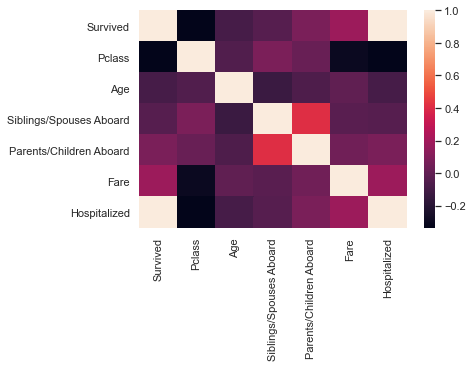

In [99]:
import seaborn as sns

sns.heatmap(column_correlation);
plt.show()

Due to the high correlation, we will remove "Hospitalized" from the data set

In [100]:
titanic_df = titanic_df.drop(columns= ['Hospitalized'])
titanic_df.head(3)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22,1,0,725
5,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38,1,0,712833
6,1,3,Miss. Laina Heikkinen,female,26,0,0,7925


### Preparation of data

The 'Sex' variable is a categorical variable. Therefore, it needs to be converted to numbers.

In [10]:
#Encoding gender variable to numerical variable
surviver_encoder = preprocessing.LabelEncoder()

# Encoding of the gender
surviver_encoder.fit(titanic_df.Sex)
print(surviver_encoder.classes_)
titanic_df.Sex = surviver_encoder.transform(titanic_df.Sex)

# deleting name
titanic_df = titanic_df.drop(columns=['Name'])
titanic_df.head()

['female' 'male']


,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Hospitalized
0,0,3,1,22,1,0,725,0
1,0,3,1,22,1,0,725,0
2,0,3,1,22,1,0,725,0
3,0,3,1,22,1,0,725,0
4,0,3,1,22,1,0,725,0


# Demo 2: Logistic Regression 

## 1. Preparation of training and test dataset

In [13]:
#Creating test and training datasets
titanic_train, titanic_test = train_test_split(titanic_df,train_size = 0.7)

print('Size of training dataset: ', titanic_train.shape)
print('Size of test dataset: ', titanic_test.shape)

Size of training dataset:  (625, 8)
Size of test dataset:  (269, 8)


In [14]:
X_train = titanic_train.drop(columns='Survived', axis =1)
Y_train = titanic_train['Survived']
X_test = titanic_test.drop(columns='Survived', axis =1)
Y_test = titanic_test['Survived']
X_train.shape, Y_train.shape, X_test.shape

((625, 7), (625,), (269, 7))

## 2. Training the model

In [15]:
# Logistic Regression - training the model
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
# Using the trained model to predict the outcome of the X_Test dataset
Y_pred = logreg.predict(X_test)
#Calculating the accuracy of the training dataset
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

64.64

In [16]:
# indicates the value of the slope of each parameter 
coeff_df = pd.DataFrame(titanic_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
6,Hospitalized,0.000352
5,Fare,0.000001
4,Parents/Children Aboard,-0.000041
3,Siblings/Spouses Aboard,-0.000194
1,Sex,-0.000380
0,Pclass,-0.000736
2,Age,-0.012718


In [106]:
#model.intercept_ indicates the intercept with the Y-axis
logreg.intercept_

array([-0.00040989])

In [107]:
# evalate the model on the test data
logreg.score(X_test, Y_test)

0.6329588014981273

In [108]:
#indicating which person will survive in the dataset
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

# Demo3: Model Evaluation

### 1. Confusion matrix

In [109]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[153,   5],
       [ 93,  16]], dtype=int64)

In [110]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print('accuracy:', accuracy_score(Y_test, Y_pred))
print('recall:', recall_score(Y_test, Y_pred, average='weighted'))
print('f1-score:', f1_score(Y_test, Y_pred, average='weighted'))
print('precision:', precision_score(Y_test, Y_pred))

accuracy: 0.6329588014981273
recall: 0.6329588014981273
f1-score: 0.5487042567696702
precision: 0.7619047619047619


## 2. AUC

In [116]:
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(Y_test, logreg.predict_proba(X_test)[:,1])
roc

0.5657008477528742

In [117]:
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
# calculate AUC
auc = roc_auc_score(Y_test, Y_pred)
print('AUC: %.3f' % auc)

AUC: 0.558


In [118]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [119]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Y_test))]

In [120]:
# predict probabilities
lr_probs = logreg.predict_proba(X_test)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.566


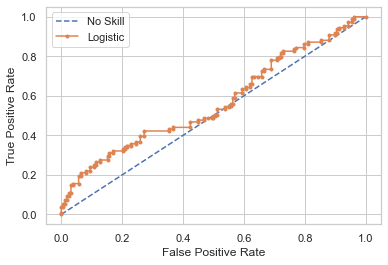

In [121]:
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()